### **Import Important Libraries**

In [ ]:
import torch
import torch.nn as nn

# **1.Batch Normalization**

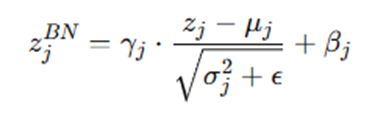

In [ ]:
class BatchNormalization(nn.Module):
    def __init__(self, num_features: int, eps: float = 1e-5) -> None:
        super().__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        mean = x.mean(dim=(0, 2, 3), keepdim=True)  # Compute mean along N, H, W dimensions
        std = x.std(dim=(0, 2, 3), keepdim=True, unbiased=False)  # Use std for consistency
        return self.gamma * (x - mean) / (std + self.eps) + self.beta

In [ ]:
nn.BatchNorm2d(
    num_features=64,   # Number of input channels (e.g., 64 feature maps from a convolution layer)
    eps=1e-05,         # A small constant added to the denominator for numerical stability to avoid division by zero
    momentum=0.1,      # Momentum for running average of mean and variance. A value between 0 and 1 controls how fast the running average updates.
    affine=True,       # 4. affine (bool) - If set to True, it means that BatchNorm2d will learn the scaling factor (gamma) and shifting factor (beta). This allows the model to learn these values during training.
    track_running_stats=True,  # Whether to track the running mean and variance during training. This is usually kept True during training
    device=None,       # The device on which to allocate the tensors (e.g., 'cpu' or 'cuda'). If None, uses the device of input tensor
    dtype=None         # The data type for the parameters. If None, uses the data type of the input tensor
)

# **2. Layer Normalization**

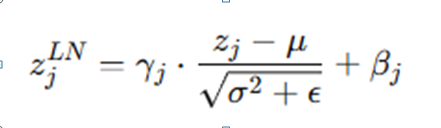

In [ ]:
class LayerNormalization(nn.Module):

    def __init__(self, eps: float = 10**-6) -> None: #0.000001
        super().__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(1))
        self.beta = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True)
        std = x.std(dim = -1, keepdim = True)
        return self.alpha * (x-mean) / (std + self.eps) + self.bias

In [ ]:

nn.LayerNorm(
    normalized_shape=[64],       # Shape of the input tensor that is to be normalized. Typically, this is the feature dimension (e.g., 64 channels in case of 1D feature vectors or flattened tensors)
    eps=1e-05,                   # A small value added to the denominator for numerical stability to avoid division by zero
    elementwise_affine=True,     # If True, LayerNorm will learn the scaling factor (gamma) and shifting factor (beta) for each feature.
    bias=True,                   # If True, this allows the layer to add a bias to the normalized output (i.e., the shift term in LayerNorm).
    device=None,                 # The device on which to allocate the tensors (e.g., 'cpu' or 'cuda'). If None, uses the device of the input tensor
    dtype=None                   # The data type for the parameters. If None, uses the data type of the input tensor
)

# **3.Group Normalization(GroupNorm)**

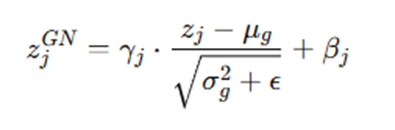

In [ ]:
class GroupNormalization(nn.Module):
    def __init__(self, num_groups: int, num_channels: int, eps: float = 1e-5) -> None:
        super().__init__()
        self.num_groups = num_groups
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(num_channels))
        self.beta = nn.Parameter(torch.zeros(num_channels))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        N, C, H, W = x.shape
        x = x.view(N, self.num_groups, C // self.num_groups, H, W)  # Reshape for groups
        mean = x.mean(dim=(2, 3, 4), keepdim=True)
        std = x.std(dim=(2, 3, 4), keepdim=True, unbiased=False)
        x = (x - mean) / (std + self.eps)
        return self.gamma.view(1, -1, 1, 1) * x.view(N, C, H, W) + self.beta.view(1, -1, 1, 1)


In [ ]:
nn.GroupNorm(
    num_groups=4,  # Number of groups to divide the channels
    num_channels=16,  # Total number of feature channels
    eps=1e-05,  # Small epsilon for numerical stability
    affine=True  # Enables learnable gamma (scale) and beta (shift)
)

## **4.Instance Normalization**

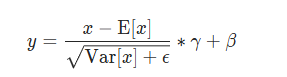

In [ ]:
class InstanceNormalization(nn.Module):
    def __init__(self, num_features: int, eps: float = 1e-5) -> None:
        super().__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        mean = x.mean(dim=(2, 3), keepdim=True)  # Compute mean along H, W dimensions
        std = x.std(dim=(2, 3), keepdim=True, unbiased=False)
        return self.gamma.view(1, -1, 1, 1) * (x - mean) / (std + self.eps) + self.beta.view(1, -1, 1, 1)

In [ ]:
nn.InstanceNorm2d(
    num_features=32,      # The number of feature channels (C) in the input
    eps=1e-05,            # A small constant to avoid division by zero during normalization
    momentum=0.1,         # Momentum for updating running mean and variance (if track_running_stats=True)
    affine=False,         # Whether to include learnable parameters (gamma and beta)
    track_running_stats=False, # Whether to keep running estimates of mean/variance for training/testing
    device=None,          # Specifies the device where the parameters will be stored (e.g., 'cuda' for GPU)
    dtype=None            # Specifies the data type of the parameters (e.g., torch.float32)
)

# **5.RMSNormalization**

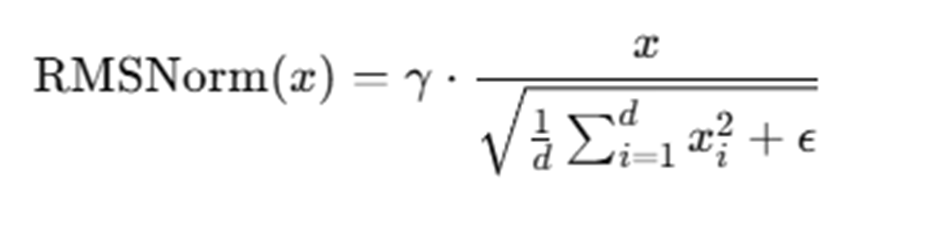

In [ ]:
class RMSNormalization(nn.Module):
    """Applies Root Mean Square (RMS) Normalization."""
    def __init__(self, dim: int, eps: float = 1e-6) -> None:
        super().__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(dim))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        rms = torch.sqrt(x.pow(2).mean(dim=-1, keepdim=True) + self.eps)
        return self.gamma * (x / rms)

In [ ]:
nn.RMSNorm(
    normalized_shape=(32,),  # Shape of the last dimension to normalize
    eps=1e-05,              # A small constant for numerical stability
    elementwise_affine=True, # Whether to learn scale (gamma) parameters
    device=None,            # Device to store parameters (e.g., 'cuda' for GPU)
    dtype=None              # Data type of the parameters (e.g., torch.float32)
)